In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [9]:
ticker = "BTC-USD"
stock = yf.Ticker(ticker.upper())
history = stock.history(period="max")
history['Volatility'] = ((history['High'] - history['Low']) / history['Open']) * 100

In [10]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volatility
count,"4,049.00","4,049.00","4,049.00","4,049.00","4,049.00","4,049.00","4,049.00","4,049.00"
mean,"25,544.89","26,065.24","24,997.17","25,569.98","20,938,524,474.95",0.00,0.00,4.33
std,"30,454.09","30,980.69","29,896.37","30,477.18","22,276,704,910.17",0.00,0.00,3.54
min,176.90,211.73,171.51,178.10,"5,914,570.00",0.00,0.00,0.26
25%,"2,539.24","2,615.25","2,480.47","2,539.32","1,147,859,968.00",0.00,0.00,1.98
50%,"10,369.03","10,627.27","10,140.84","10,369.56","16,678,702,876.00",0.00,0.00,3.40
75%,"40,026.02","41,287.54","38,980.88","40,030.98","32,447,188,386.00",0.00,0.00,5.44
max,"124,752.14","126,198.07","123,196.05","124,752.53","350,967,941,479.00",0.00,0.00,38.78


In [4]:
history["Close"].quantile()

15245.951171875

In [5]:
stock.info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,935,928. The last known price of Bitcoin is 105,779.46120882 USD and is down -5.06 over the last 24 hours. It is currently trading on 12433 active market(s) with $113,845,468,947.48 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'executiveTeam': [],
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 108202.914,
 'open': 108202.914,
 'dayLow': 103736.4,
 'dayHigh': 109194.79,
 'regularMarketPreviousClose': 108202.914,
 'regularMarketOpen': 108202.914,
 'regularMarketDayLow': 103736.4,
 'regularMarketDayHigh': 109194.79,
 'volume': 102769426432,
 'regularMarketVolume': 102769426432,
 'averageVolume': 63256209376,
 'averageVolume10days': 89690459458,
 'averageDailyVolume10Day': 89690459458,
 'marketCap': 212259648

In [ ]:
stock.financials

In [ ]:
stock.cash_flow

In [ ]:
stock.balance_sheet

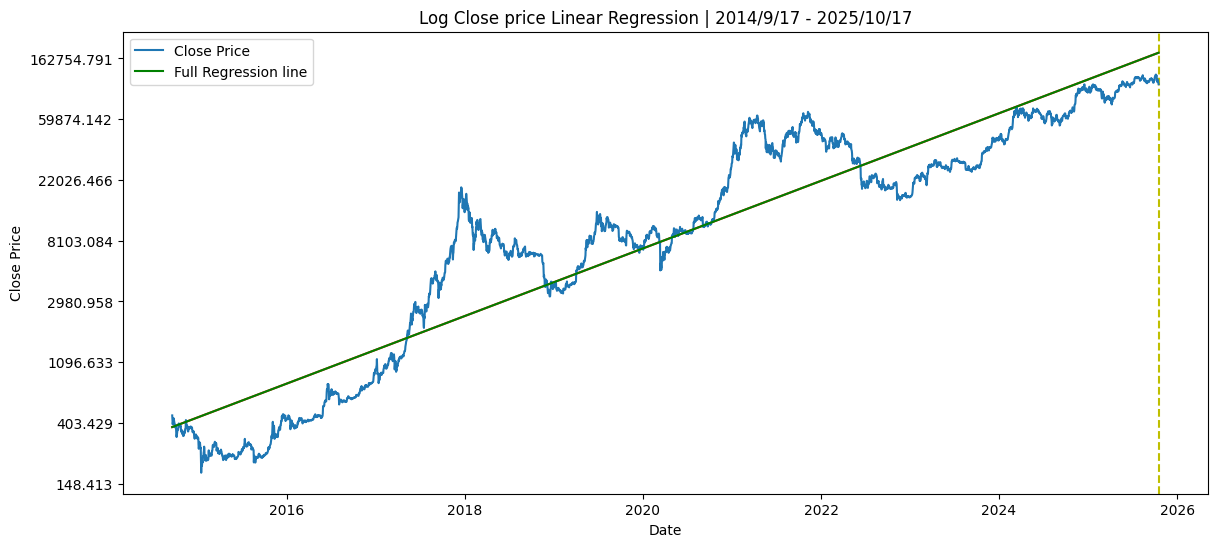

Coefficient (slope): 0.0015216575563426116


In [11]:
a = plotting.plot_regression_line(history, reg_line_count=0, log_scale=True)

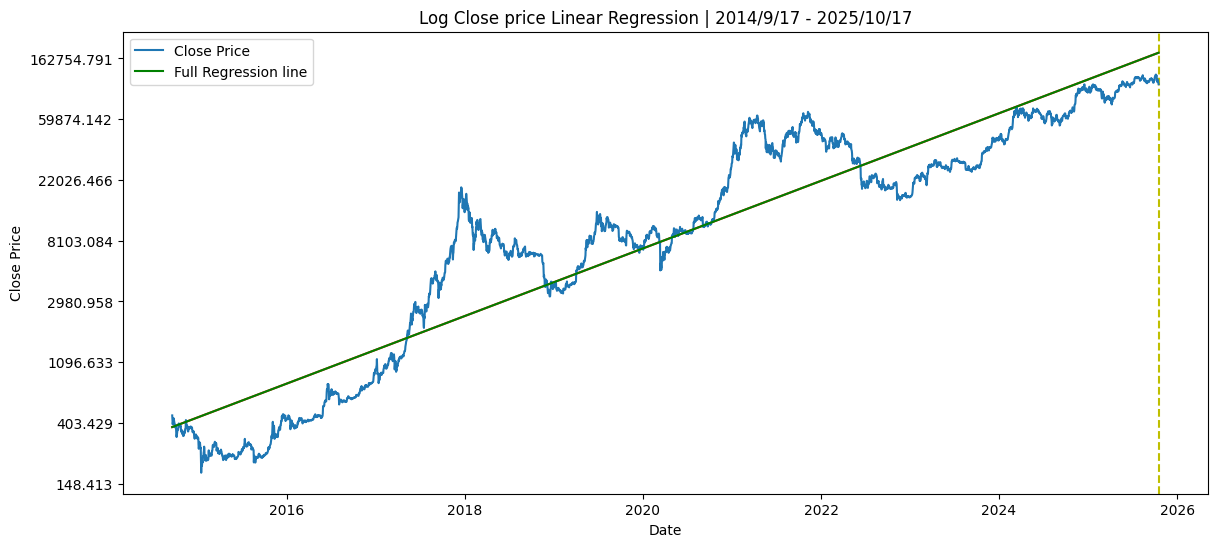

Coefficient (slope): 0.0015216575563426116


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [12]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=True)

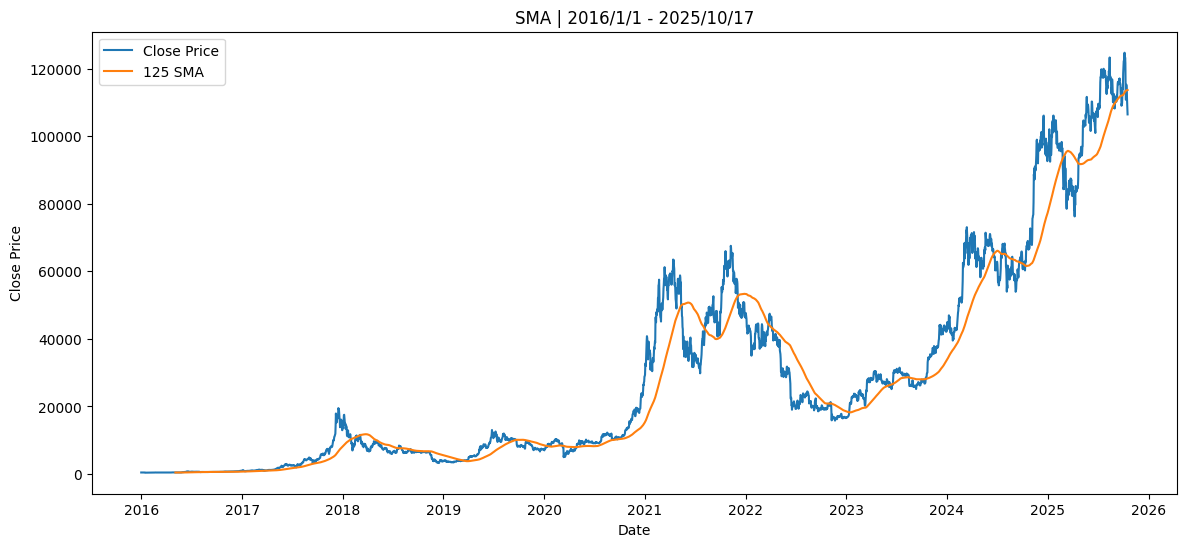

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [13]:
plotting.plot_sma(history["2016":], [125], hide_data=False, log_scale=False)

<BarContainer object of 4049 artists>

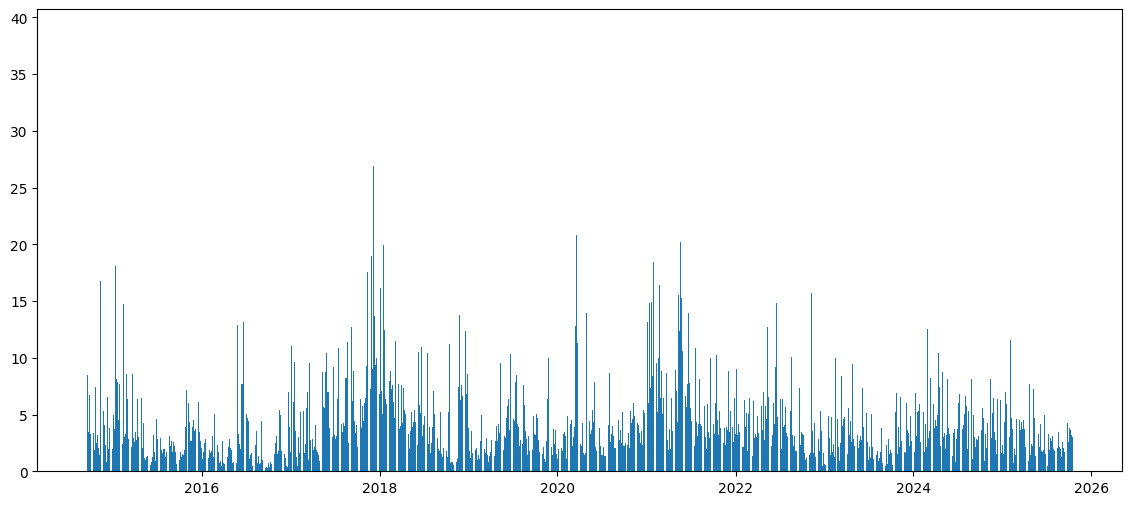

In [14]:
plt.figure(figsize=(14, 6))
filtered_history = history.loc["2000":]
plt.bar(filtered_history.index, filtered_history["Volatility"])

<BarContainer object of 4049 artists>

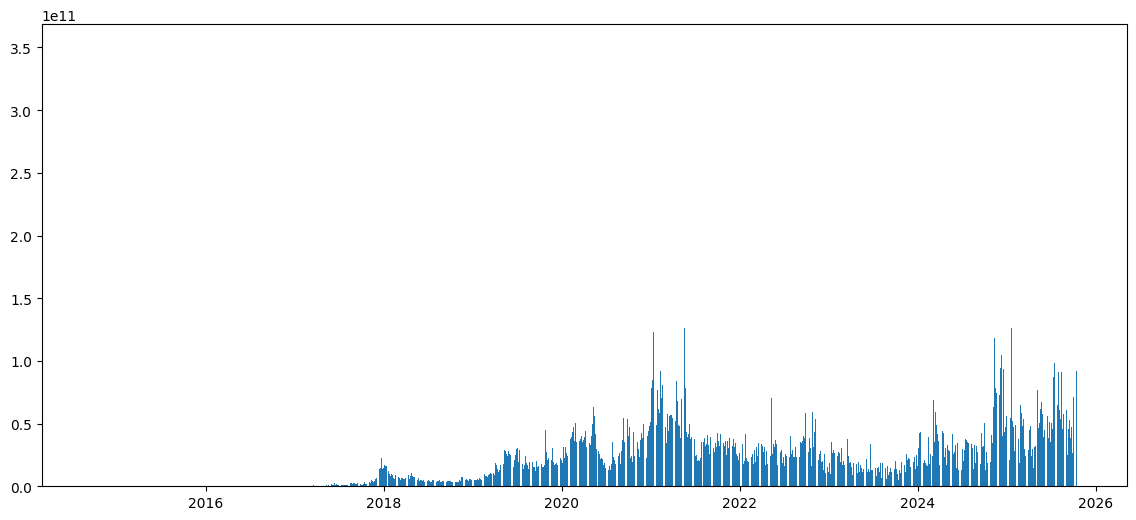

In [15]:
plt.figure(figsize=(14, 6))
plt.bar(filtered_history.index, filtered_history["Volume"])

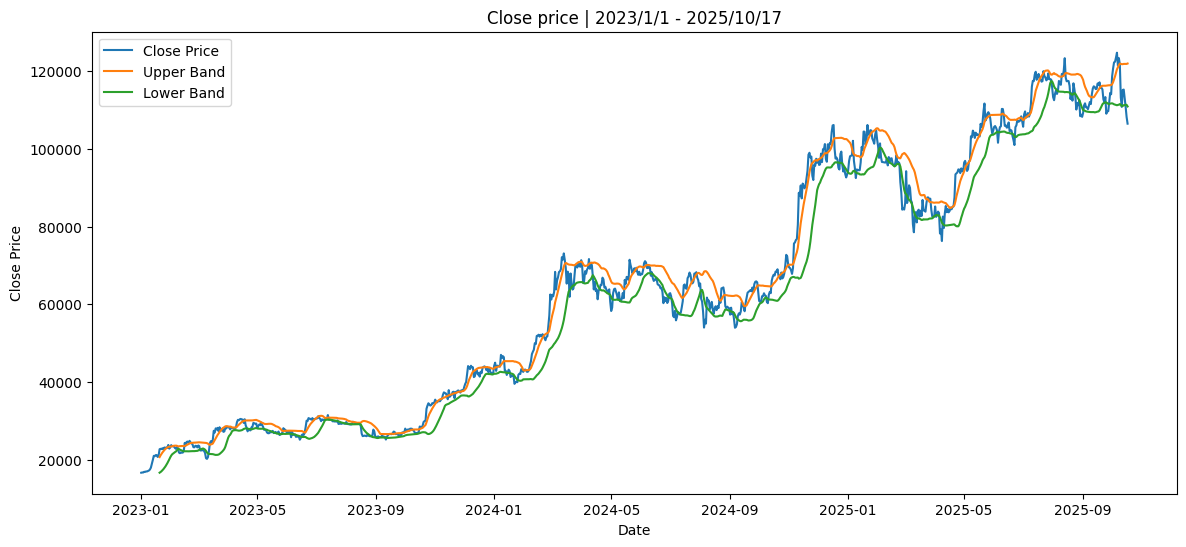

In [16]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [17]:
import ta
import pandas as pd
from ta.utils import dropna

history = history["2020":]
indicator = ta.momentum.RSIIndicator(history["Close"])

history["Indicator"] = indicator.rsi()

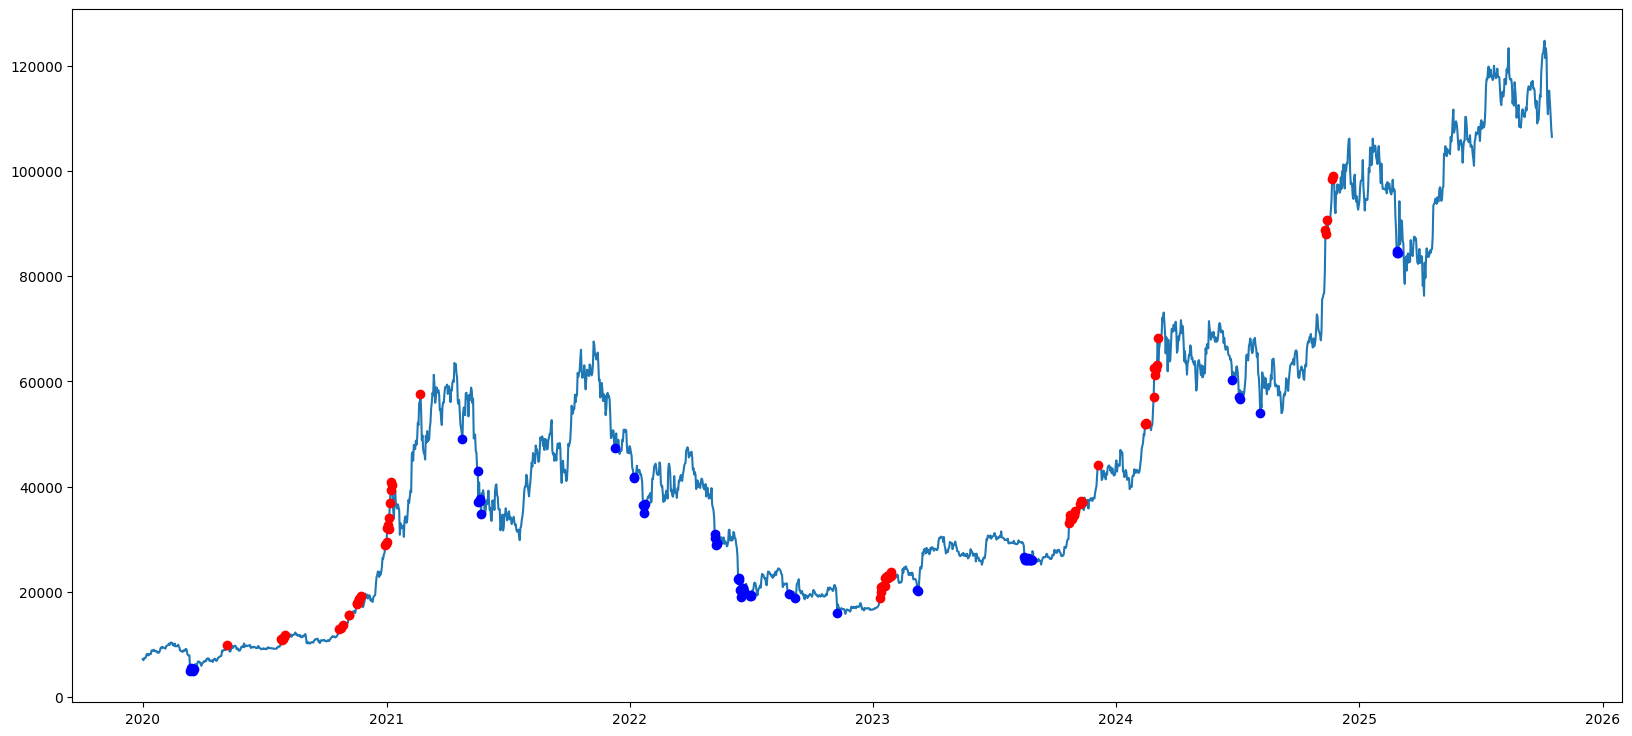

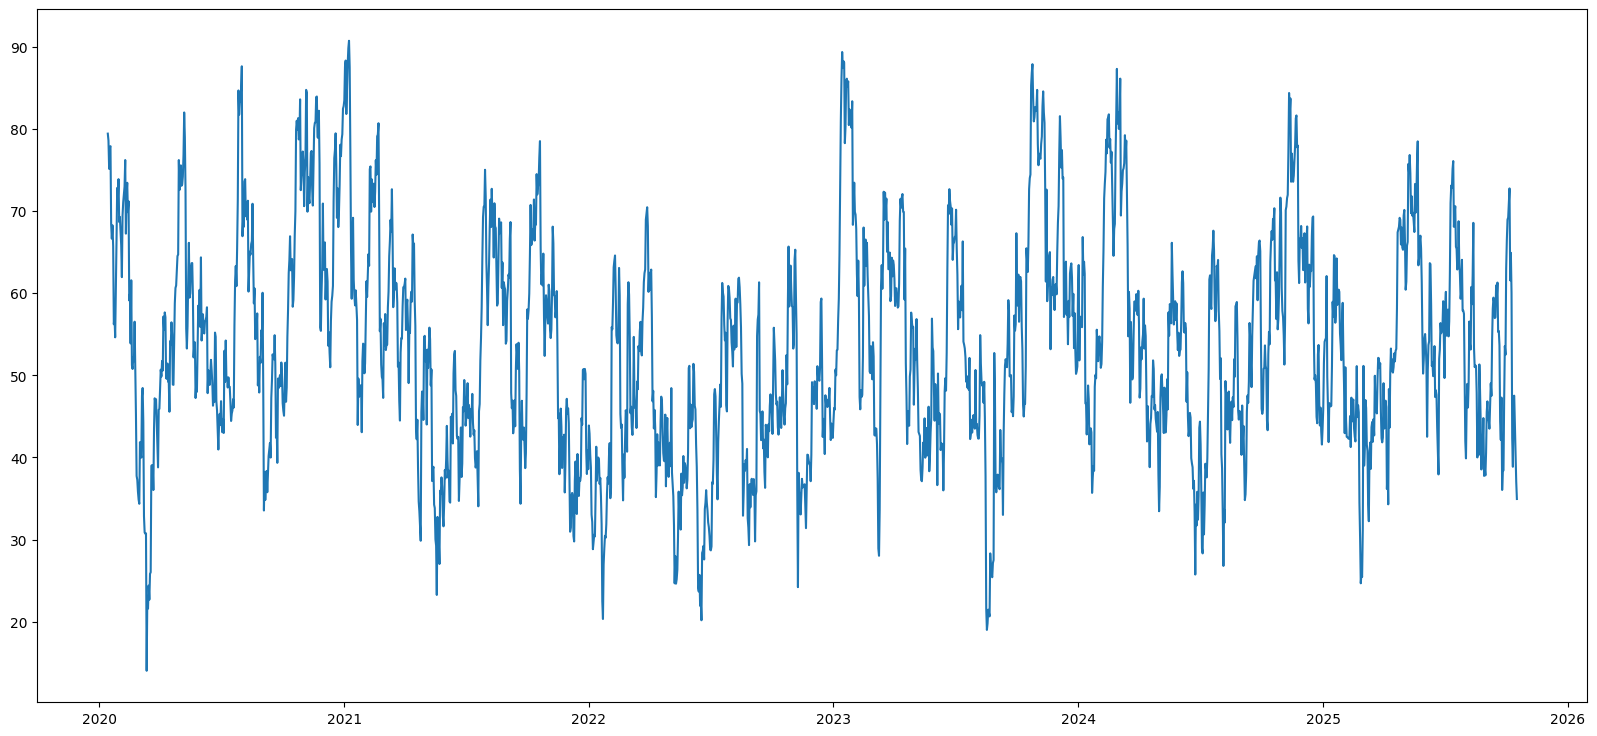

In [18]:
plt.figure(figsize=(20, 9))
plt.plot(history["Close"])
filter_high = history["Indicator"] >= 80
filter_low = history["Indicator"] <= 30
plt.plot(
    history.index[filter_high],
    history["Close"][filter_high],
    marker="o",
    linestyle="None",
    color="red",
)
plt.plot(
    history.index[filter_low],
    history["Close"][filter_low],
    marker="o",
    linestyle="None",
    color="blue",
)
plt.figure(figsize=(20, 9))
plt.plot(history["Indicator"])